In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
data = pd.read_csv("/content/drive/Shareddrives/Energy-PNNL/Code/data/seb_processed_data.csv")
data.set_index('time', inplace=True)
data.index = pd.to_datetime(data.index)

In [3]:
# /ZoneTemperature.csv
zone_df_temp = data.filter(regex=('/ZoneTemperature.csv|External Temperature'))
zone_df_temp = zone_df_temp.resample("H").mean()
zone_df_temp.corr()
corr_matrix_temp = zone_df_temp.corr()
mask = np.zeros_like(corr_matrix_temp, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

[Text(0.5, 0, 'VAV100'),
 Text(1.5, 0, 'VAV102'),
 Text(2.5, 0, 'VAV118'),
 Text(3.5, 0, 'VAV119'),
 Text(4.5, 0, 'VAV120'),
 Text(5.5, 0, 'VAV121'),
 Text(6.5, 0, 'VAV123A'),
 Text(7.5, 0, 'VAV127A'),
 Text(8.5, 0, 'VAV127B'),
 Text(9.5, 0, 'VAV129'),
 Text(10.5, 0, 'VAV131'),
 Text(11.5, 0, 'VAV133'),
 Text(12.5, 0, 'VAV136'),
 Text(13.5, 0, 'VAV142'),
 Text(14.5, 0, 'VAV143'),
 Text(15.5, 0, 'VAV150'),
 Text(16.5, 0, '/SEB/AHU2'),
 Text(17.5, 0, 'VAV104'),
 Text(18.5, 0, 'VAV105'),
 Text(19.5, 0, 'VAV107'),
 Text(20.5, 0, 'VAV108'),
 Text(21.5, 0, 'VAV112'),
 Text(22.5, 0, 'VAV116'),
 Text(23.5, 0, '/SEB/AHU4'),
 Text(24.5, 0, 'External Temperature')]

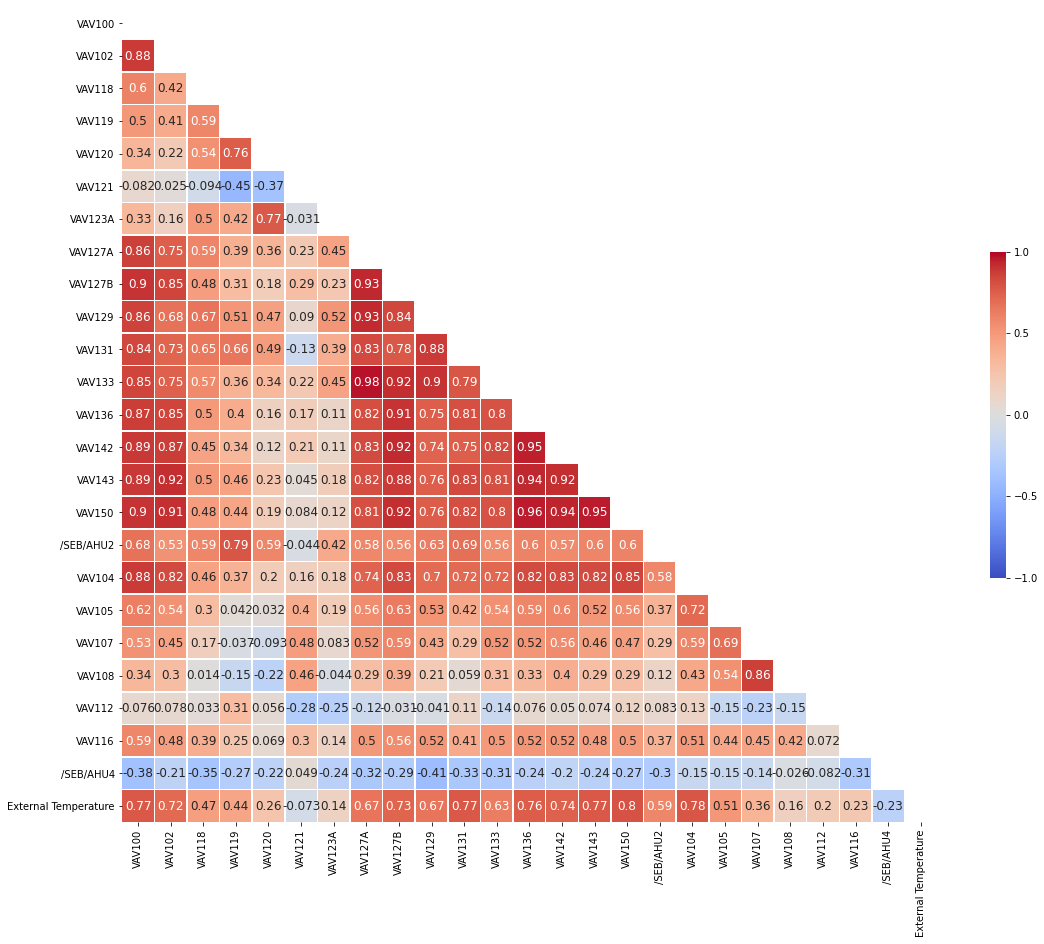

In [4]:
f, ax = plt.subplots(figsize=(19, 15)) 
heatmap = sns.heatmap(corr_matrix_temp, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix_temp.columns, rotation = 0)
ax.set_xticklabels(corr_matrix_temp.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
old_lables_y, old_lables_x = heatmap.get_yticklabels(), heatmap.get_xticklabels()
new_lables_y, new_lables_x =[], []
for old_label in old_lables_y:
  new_lables_y.append(old_label.get_text().replace("/ZoneTemperature.csv","").replace("/SEB/AHU1/","").replace("/SEB/AHU3/",""))
for old_label in old_lables_x:
  new_lables_x.append(old_label.get_text().replace("/ZoneTemperature.csv","").replace("/SEB/AHU1/","").replace("/SEB/AHU3/",""))  

  
ax.set_yticklabels(new_lables_y) 
ax.set_xticklabels(new_lables_x) 

In [5]:
zone_df_temperature = data.filter(regex=('/ZoneTemperature.csv|External Temperature'))
zone_df_temperature = zone_df_temperature.resample("H").mean()
zone_df_temperature = zone_df_temperature.transpose()
zone_df_temperature.reset_index(inplace=True)
zone_df_temperature["index"] = zone_df_temperature["index"].apply(lambda x: x.replace("/ZoneTemperature.csv","").replace("/SEB/AHU1/","").replace("/SEB/AHU3/",""))
zone_df_temperature.set_index("index", inplace=True)
zone_df_temperature = zone_df_temperature.dropna(axis='columns')
zone_df_temperature

time,2018-11-30 17:00:00,2018-11-30 18:00:00,2018-11-30 19:00:00,2018-11-30 20:00:00,2018-11-30 21:00:00,2018-11-30 22:00:00,2018-11-30 23:00:00,2018-12-01 00:00:00,2018-12-01 01:00:00,2018-12-01 02:00:00,2018-12-01 03:00:00,2018-12-01 04:00:00,2018-12-01 05:00:00,2018-12-01 06:00:00,2018-12-01 07:00:00,2018-12-01 08:00:00,2018-12-01 09:00:00,2018-12-01 10:00:00,2018-12-01 11:00:00,2018-12-01 12:00:00,2018-12-01 13:00:00,2018-12-01 14:00:00,2018-12-01 15:00:00,2018-12-01 16:00:00,2018-12-01 17:00:00,2018-12-01 18:00:00,2018-12-01 19:00:00,2018-12-01 20:00:00,2018-12-01 21:00:00,2018-12-01 22:00:00,2018-12-01 23:00:00,2018-12-02 00:00:00,2018-12-02 01:00:00,2018-12-02 02:00:00,2018-12-02 03:00:00,2018-12-02 04:00:00,2018-12-02 05:00:00,2018-12-02 06:00:00,2018-12-02 07:00:00,2018-12-02 08:00:00,...,2020-04-27 06:00:00,2020-04-27 07:00:00,2020-04-27 08:00:00,2020-04-27 09:00:00,2020-04-27 10:00:00,2020-04-27 11:00:00,2020-04-27 12:00:00,2020-04-27 13:00:00,2020-04-27 14:00:00,2020-04-27 15:00:00,2020-04-27 16:00:00,2020-04-27 17:00:00,2020-04-27 18:00:00,2020-05-04 17:00:00,2020-05-04 18:00:00,2020-05-04 19:00:00,2020-05-04 20:00:00,2020-05-04 21:00:00,2020-05-04 22:00:00,2020-05-04 23:00:00,2020-05-05 00:00:00,2020-05-05 01:00:00,2020-05-05 02:00:00,2020-05-05 03:00:00,2020-05-05 04:00:00,2020-05-05 05:00:00,2020-05-05 06:00:00,2020-05-05 07:00:00,2020-05-05 08:00:00,2020-05-05 09:00:00,2020-05-05 10:00:00,2020-05-05 11:00:00,2020-05-05 12:00:00,2020-05-05 13:00:00,2020-05-06 11:00:00,2020-05-06 12:00:00,2020-05-06 13:00:00,2020-05-06 14:00:00,2020-05-06 15:00:00,2020-05-06 16:00:00
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VAV100,69.803925,69.663335,69.626668,69.475000,69.410001,69.190003,69.088335,68.775003,68.740003,68.571666,68.435001,68.250003,68.088335,67.993333,67.918335,67.993333,68.064999,68.221670,68.295003,68.371669,68.561666,68.645001,68.646668,68.750004,68.753337,68.775003,68.791670,68.675003,68.521666,68.348336,68.245004,68.180003,68.148336,68.061666,68.001667,67.961667,67.931668,67.948334,67.980000,68.121667,...,69.411668,69.298336,69.351669,69.406781,69.491667,69.534999,69.668335,69.838599,69.966950,70.071186,70.170002,70.266670,70.400002,69.483334,69.648335,69.798336,69.843336,69.763337,69.703338,69.601666,69.451667,69.368335,69.238337,69.025000,68.788337,68.595001,68.595000,68.559999,68.646668,68.753337,68.856002,68.987013,69.072728,69.134617,69.900002,69.826669,69.646667,69.476667,69.251670,69.051667
VAV102,69.698041,68.345002,68.210004,68.046670,67.270001,66.948333,65.856667,65.900002,65.605001,65.490000,65.201669,64.593333,64.000001,64.013333,63.900001,63.756668,63.806668,64.146667,64.388333,64.891667,65.406668,65.580001,65.635001,66.060002,65.930001,65.813336,65.900002,65.755001,65.450001,65.196671,65.166668,64.998335,64.556668,64.388334,64.265002,64.230001,64.363335,64.233335,64.160001,64.315002,...,68.285002,67.758337,67.876669,68.096612,68.583335,68.881668,69.713335,70.784212,71.747460,72.379663,72.440001,72.253337,72.200005,72.433334,72.756668,73.016666,72.896668,72.671670,72.380002,71.843336,71.436669,70.936668,70.480001,70.116667,69.581668,68.983336,67.960002,67.460001,67.835002,67.883336,68.556002,69.967712,70.881819,71.653849,69.500000,70.065001,70.820000,70.793335,70.003335,69.670003
VAV118,69.458824,69.403335,71.028335,71.873335,72.160004,72.246671,72.400002,72.400002,72.420001,72.456667,72.586665,72.596665,72.599998,72.599998,72.599998,72.599998,72.596665,72.596665,72.593332,72.593332,72.593332,72.599998,72.599998,72.606666,72.696671,72.700005,72.700005,72.700005,72.698338,72.656669,72.609999,72.599998,72.599998,72.599998,72.599998,72.599998,72.611666,72.633334,72.599998,72.599998,...,70.070001,68.935001,69.000000,68.988136,68.863335,69.273335,69.276670,69.200005,69.122037,69.000000,69.000000,69.000000,68.900002,69.000000,70.876668,72.016669,72.420001,72.670003,72.856669,73.056666,73.109999,73.266669,73.263336,73.263336,73.300003,73.300003,69.783336,6

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px

#data = StandardScaler().fit_transform(zone_df_temperature)
tsne=TSNE(n_components=2,random_state=0,perplexity=30, metric="cosine")
tsne2d=tsne.fit_transform(zone_df_temperature)
df_tsne = pd.DataFrame({'x':tsne2d[:,0],'y':tsne2d[:,1],'index':zone_df_temperature.index.tolist()})
fig = px.scatter(df_tsne, x="x", y="y", hover_name="index", title="t-SNE for ZoneTemperature")
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(autosize=False,width=500,height=500)
fig.show()
#sns.scatterplot(tsne2d[:,0], tsne2d[:,1])


In [7]:

columns_temp = ['VAV100', 'VAV102', 'VAV118', 'VAV119', 'VAV120', 'VAV121', 'VAV123A',
       'VAV127A', 'VAV127B', 'VAV129', 'VAV131', 'VAV133', 'VAV136', 'VAV142',
       'VAV143', 'VAV150', '/SEB/AHU2', 'VAV104', 'VAV105', 'VAV107', 'VAV108',
       'VAV112', 'VAV116', '/SEB/AHU4', 'ExternalTemperature']
topology_corr = [[1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0],
                 [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0],
                 [1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                 [0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                 [0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                 [1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
                 [1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
                 [1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                 [1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0],
                 [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0],
                 [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                 [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]

In [8]:
new_df = pd.DataFrame(topology_corr, columns=columns_temp, index = columns_temp)
#new_df

In [9]:
#Calculating distance
def distance(p1, p2):
  return math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

In [10]:
corr_matrix_temp.columns = corr_matrix_temp.columns.str.replace("/ZoneTemperature.csv","")
corr_matrix_temp.columns = corr_matrix_temp.columns.str.replace("/SEB/AHU1/","")
corr_matrix_temp.columns = corr_matrix_temp.columns.str.replace("/SEB/AHU3/","")
corr_matrix_temp.reset_index(inplace=True)
corr_matrix_temp["index"] = corr_matrix_temp["index"].apply(lambda x: x.replace("/ZoneTemperature.csv","").replace("/SEB/AHU1/","").replace("/SEB/AHU3/",""))
corr_matrix_temp.set_index('index', inplace=True, )
corr_matrix_temp


,VAV100,VAV102,VAV118,VAV119,VAV120,VAV121,VAV123A,VAV127A,VAV127B,VAV129,VAV131,VAV133,VAV136,VAV142,VAV143,VAV150,/SEB/AHU2,VAV104,VAV105,VAV107,VAV108,VAV112,VAV116,/SEB/AHU4,External Temperature
index,,,,,,,,,,,,,,,,,,,,,,,,,
VAV100,1.000000,0.878083,0.601792,0.502534,0.344063,0.082210,0.330959,0.861851,0.903989,0.856994,0.838951,0.849724,0.867445,0.886269,0.889301,0.900973,0.675570,0.882588,0.623550,0.532230,0.342092,0.076449,0.592689,-0.375653,0.773458
VAV102,0.878083,1.000000,0.420681,0.408919,0.218235,0.025040,0.163486,0.750498,0.845190,0.677246,0.728866,0.748185,0.851117,0.871261,0.915884,0.908422,0.534815,0.821462,0.535751,0.454508,0.298711,0.078103,0.476120,-0.211005,0.717283
VAV118,0.601792,0.420681,1.000000,0.592431,0.542670,-0.093549,0.496074,0.594268,0.480491,0.665803,0.653998,0.573754,0.497069,0.448017,0.502915,0.484104,0.592787,0.457814,0.298961,0.165027,0.013808,0.032984,0.393348,-0.351587,0.473441
VAV119,0.502534,0.408919,0.592431,1.000000,0.761111,-0.445261,0.419592,0.385351,0.310176,0.510408,0.661304,0.359591,0.403730,0.341130,0.460319,0.441730,0.787662,0.368890,0.042040,-0.037349,-0.151662,0.306280,0.254203,-0.270890,0.443574
VAV120,0.344063,0.218235,0.542670,0.761111,1.000000,-0.368747,0.766398,0.359995,0.181347,0.466905,0.488176,0.335841,0.155266,0.115517,0.234377,0.191297,0.592289,0.195038,0.032300,-0.093246,-0.222015,0.055827,0.068588,-0.223864,0.255478
VAV121,0.082210,0.025040,-0.093549,-0.445261,-0.368747,1.000000,-0.031480,0.226372,0.294057,0.089720,-0.127346,0.222813,0.174327,0.208436,0.044871,0.084074,-0.044006,0.162607,0.401233,0.483273,0.457933,-0.281061,0.300487,0.048667,-0.072992
VAV123A,0.330959,0.163486,0.496074,0.419592,0.766398,-0.031480,1.000000,0.450864,0.232867,0.516488,0.392924,0.448411,0.109629,0.108118,0.178803,0.123487,0.419073,0.175777,0.191309,0.082969,-0.043885,-0.250548,0.138852,-0.240337,0.139837
VAV127A,0.861851,0.750498,0.594268,0.385351,0.359995,0.226372,0.450864,1.000000,0.933387,0.925246,0.828623,0.975613,0.818373,0.826903,0.816297,0.812207,0.578336,0.735571,0.560215,0.521104,0.292098,-0.123963,0.501465,-0.324008,0.665596
VAV127B,0.903989,0.845190,0.480491,0.310176,0.181347,0.294057,0.232867,0.933387,1.000000,0.838078,0.777092,0.918178,0.905411,0.922368,0.882306,0.915847,0.564101,0.829833,0.633320,0.588844,0.393337,-0.030815,0.559760,-0.288618,0.726610


In [20]:
my_columns = corr_matrix_temp.columns.tolist()
flat_data = corr_matrix_temp.to_numpy().flatten()
compatible_dict = {}
counter=0
for i in my_columns:
  for j in my_columns:
    temp_list = []
    temp_list.append(i)
    temp_list.append(j)
    temp_list.append(flat_data[counter])
    compatible_dict[counter] = temp_list
    counter=counter+1
print(compatible_dict)
ready_df = pd.DataFrame.from_dict(compatible_dict,orient = 'index', columns=['A', 'B', 'CorrelationScore'])
ready_df



{0: ['VAV100', 'VAV100', 1.0], 1: ['VAV100', 'VAV102', 0.8780831107571061], 2: ['VAV100', 'VAV118', 0.6017924495061692], 3: ['VAV100', 'VAV119', 0.502534422680809], 4: ['VAV100', 'VAV120', 0.3440626722669087], 5: ['VAV100', 'VAV121', 0.0822098157848021], 6: ['VAV100', 'VAV123A', 0.3309594050301532], 7: ['VAV100', 'VAV127A', 0.8618505770942333], 8: ['VAV100', 'VAV127B', 0.9039892408678274], 9: ['VAV100', 'VAV129', 0.8569943568523772], 10: ['VAV100', 'VAV131', 0.8389511380743573], 11: ['VAV100', 'VAV133', 0.8497237726203752], 12: ['VAV100', 'VAV136', 0.8674452812179679], 13: ['VAV100', 'VAV142', 0.8862686422647701], 14: ['VAV100', 'VAV143', 0.8893007103854472], 15: ['VAV100', 'VAV150', 0.9009733078199291], 16: ['VAV100', '/SEB/AHU2', 0.6755695419843004], 17: ['VAV100', 'VAV104', 0.8825880379816006], 18: ['VAV100', 'VAV105', 0.6235495280553899], 19: ['VAV100', 'VAV107', 0.5322295689006175], 20: ['VAV100', 'VAV108', 0.3420921218811105], 21: ['VAV100', 'VAV112', 0.07644866617086347], 22: ['

,A,B,CorrelationScore
0,VAV100,VAV100,1.000000
1,VAV100,VAV102,0.878083
2,VAV100,VAV118,0.601792
3,VAV100,VAV119,0.502534
4,VAV100,VAV120,0.344063
...,...,...,...
620,External Temperature,VAV108,0.158679
621,External Temperature,VAV112,0.197443
622,External Temperature,VAV116,0.226020
623,External Temperature,/SEB/AHU4,-0.233357


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



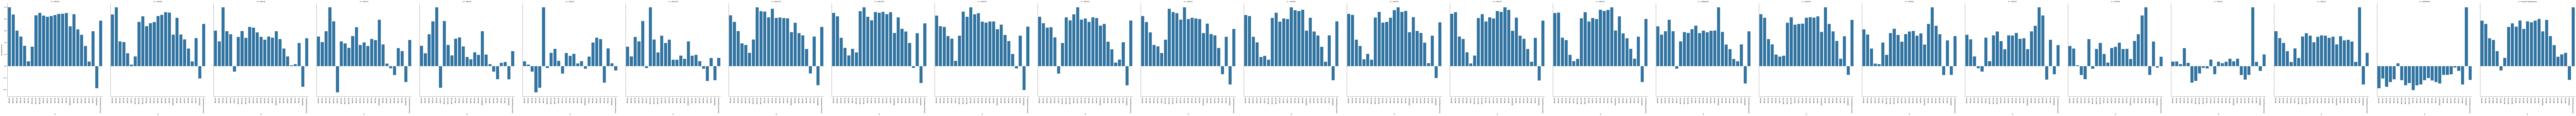

In [28]:
g = sns.FacetGrid(ready_df, col='A', height=10)
g.map(sns.barplot,'B','CorrelationScore')
g.set_xticklabels(rotation=90)